<a href="https://colab.research.google.com/github/DivyaNarayan0613/DivyaNarayan0613/blob/main/facelocalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/data/Sample Dataset.zip'
# Specify the directory where you want to extract the contents
extraction_path = '/content/sample_dataset'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print("Unzipping completed!")


Unzipping completed!


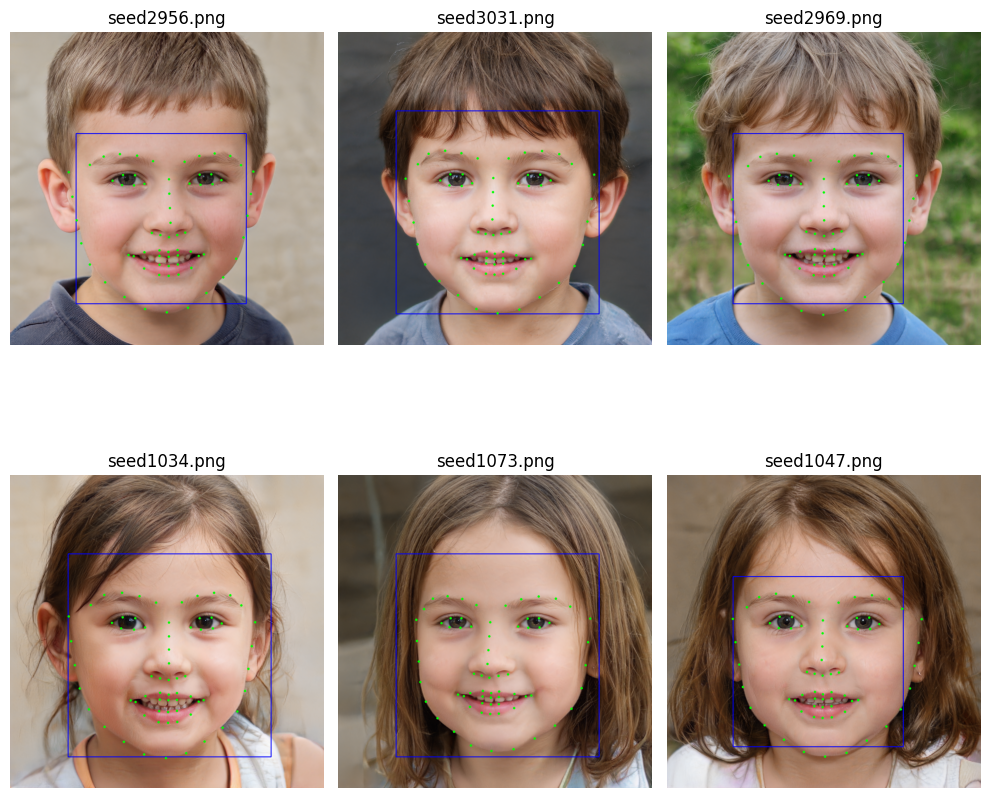

In [ ]:
import os
import cv2
import dlib
import matplotlib.pyplot as plt
from google.colab import drive

# Step 1: Mount Google Drive (if necessary)
# drive.mount('/content/drive')

# Step 2: Set paths to your image folders
boys_folder_path = '/content/sample_dataset/Child_Data/Boys'
girls_folder_path = '/content/sample_dataset/Child_Data/Girls'

# Step 3: Initialize dlib's face detector and create a facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor_path = '/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat'  # Ensure this is the correct path
predictor = dlib.shape_predictor(predictor_path)

# Step 4: List all PNG image files in both directories
boys_image_files = [f for f in os.listdir(boys_folder_path) if f.lower().endswith('.png')]
girls_image_files = [f for f in os.listdir(girls_folder_path) if f.lower().endswith('.png')]

# Select a few images (e.g., first 3 from each)
selected_boys_images = boys_image_files[:3]
selected_girls_images = girls_image_files[:3]

# Combine selected images
selected_images = selected_boys_images + selected_girls_images
selected_paths = [os.path.join(boys_folder_path, img) for img in selected_boys_images] + \
                 [os.path.join(girls_folder_path, img) for img in selected_girls_images]

# Function to detect and draw facial landmarks and localization rectangles
def show_facial_landmarks_and_localization(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = detector(gray)
    for face in faces:
        # Draw a larger rectangle around the detected face
        x1, y1, x2, y2 = (face.left() - 10, face.top() - 10, face.right() + 10, face.bottom() + 10)  # Increase the rectangle size
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw rectangle in red

        # Get the landmarks
        landmarks = predictor(gray, face)
        for n in range(68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            cv2.circle(image, (x, y), 4, (0, 255, 0), -1)  # Draw a larger green circle at the landmark point

    return image

# Step 5: Display the selected images with landmarks and face localization
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
for i, img_path in enumerate(selected_paths):
    landmark_image = show_facial_landmarks_and_localization(img_path)  # Get the image with landmarks and face localization
    img_rgb = cv2.cvtColor(landmark_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    plt.subplot(2, 3, i + 1)  # Adjust layout based on number of images
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(os.path.basename(img_path))

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unzipping completed!
Saved: /content/drive/MyDrive/Processed_Faces/landmarks_seed3012.png
Saved: /content/drive/MyDrive/Processed_Faces/landmarks_seed3020.png
Saved: /content/drive/MyDrive/Processed_Faces/landmarks_seed2964.png
Saved: /content/drive/MyDrive/Processed_Faces/landmarks_seed1007.png
Saved: /content/drive/MyDrive/Processed_Faces/landmarks_seed1039.png
Saved: /content/drive/MyDrive/Processed_Faces/landmarks_seed1025.png


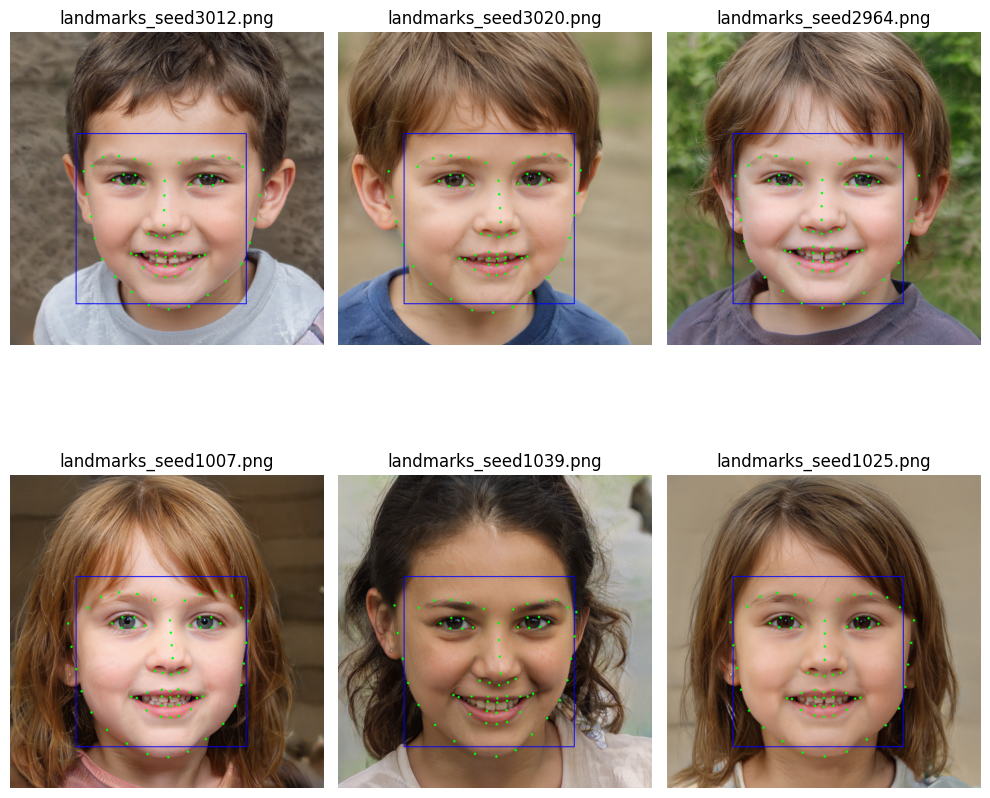

In [ ]:
import os
import cv2
import dlib
import matplotlib.pyplot as plt
from google.colab import drive
import zipfile

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Unzip the dataset file
zip_file_path = '/content/drive/MyDrive/data/Sample Dataset.zip'
extraction_path = '/content/sample_dataset'

os.makedirs(extraction_path, exist_ok=True)  # Create directory if it doesn't exist

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print("Unzipping completed!")

# Step 3: Set paths to your image folders
boys_folder_path = '/content/sample_dataset/Child_Data/Boys'
girls_folder_path = '/content/sample_dataset/Child_Data/Girls'

# Step 4: Initialize dlib's face detector and create a facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor_path = '/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat'  # Ensure this is the correct path
predictor = dlib.shape_predictor(predictor_path)

# Step 5: List all PNG image files in both directories
boys_image_files = [f for f in os.listdir(boys_folder_path) if f.lower().endswith('.png')]
girls_image_files = [f for f in os.listdir(girls_folder_path) if f.lower().endswith('.png')]

# Select a few images (e.g., first 3 from each)
selected_boys_images = boys_image_files[:3]
selected_girls_images = girls_image_files[:3]

# Combine selected images
selected_images = selected_boys_images + selected_girls_images
selected_paths = [os.path.join(boys_folder_path, img) for img in selected_boys_images] + \
                 [os.path.join(girls_folder_path, img) for img in selected_girls_images]

# Create an output directory in Google Drive
output_dir = '/content/drive/MyDrive/Processed_Faces'
os.makedirs(output_dir, exist_ok=True)

# Function to save images with facial landmarks and localization rectangles in Google Drive
def save_images_to_drive_with_landmarks(image_paths, output_folder, detector, predictor):
    """
    Function to process images, draw facial landmarks and face localization, and save them to Google Drive.

    Args:
        image_paths (list): List of image file paths to process.
        output_folder (str): Path to the Google Drive folder where processed images will be saved.
        detector (dlib): Dlib's face detector object.
        predictor (dlib): Dlib's shape predictor object.
    """
    for img_path in image_paths:
        image = cv2.imread(img_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image
        faces = detector(gray)
        for face in faces:
            # Draw a larger rectangle around the detected face
            x1, y1, x2, y2 = (face.left() - 10, face.top() - 10, face.right() + 10, face.bottom() + 10)
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw rectangle in red

            # Get the landmarks
            landmarks = predictor(gray, face)
            for n in range(68):
                x = landmarks.part(n).x
                y = landmarks.part(n).y
                cv2.circle(image, (x, y), 4, (0, 255, 0), -1)  # Draw a larger green circle at the landmark point

        # Save the image with landmarks and localization to Google Drive
        filename = os.path.basename(img_path)
        save_path = os.path.join(output_folder, f'landmarks_{filename}')
        cv2.imwrite(save_path, image)
        print(f"Saved: {save_path}")

# Step 6: Call the function to process and save images to Google Drive
save_images_to_drive_with_landmarks(selected_paths, output_dir, detector, predictor)

# Optional: Display the saved images
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
for i, img_path in enumerate(selected_paths):
    filename = os.path.basename(img_path)
    saved_image_path = os.path.join(output_dir, f'landmarks_{filename}')

    landmark_image = cv2.imread(saved_image_path)
    img_rgb = cv2.cvtColor(landmark_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    plt.subplot(2, 3, i + 1)  # Adjust layout based on number of images
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f'landmarks_{filename}')

plt.tight_layout()
plt.show()
